In [17]:
import networkx as nx  #https://www.geeksforgeeks.org/networkx-python-software-package-study-complex-networks/
import matplotlib.pyplot as plt

# Load the dataset
# Assuming the dataset is in a file called 'facebook_combined.txt'
# The file contains edges in the format: node1 node2

G = nx.read_edgelist('facebook_combined.txt')

# Basic info about the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Is the graph directed: {G.is_directed()}")
print(f"Graph density: {nx.density(G)}")

# Define start and goal nodes
start_node = input("Enter the Starting node: ")  # taking user input for the starting node
goal_node = input("Enter the Destination node: ")  # taking user input for the destination node

# Ensure start_node and goal_node are in the graph
if start_node not in G or goal_node not in G:
    raise ValueError("Start or goal node not in graph")

Number of nodes: 4039
Number of edges: 88234
Is the graph directed: False
Graph density: 0.010819963503439287


Shortest path from 100 to 500: ['100', '0', '34', '348', '500']


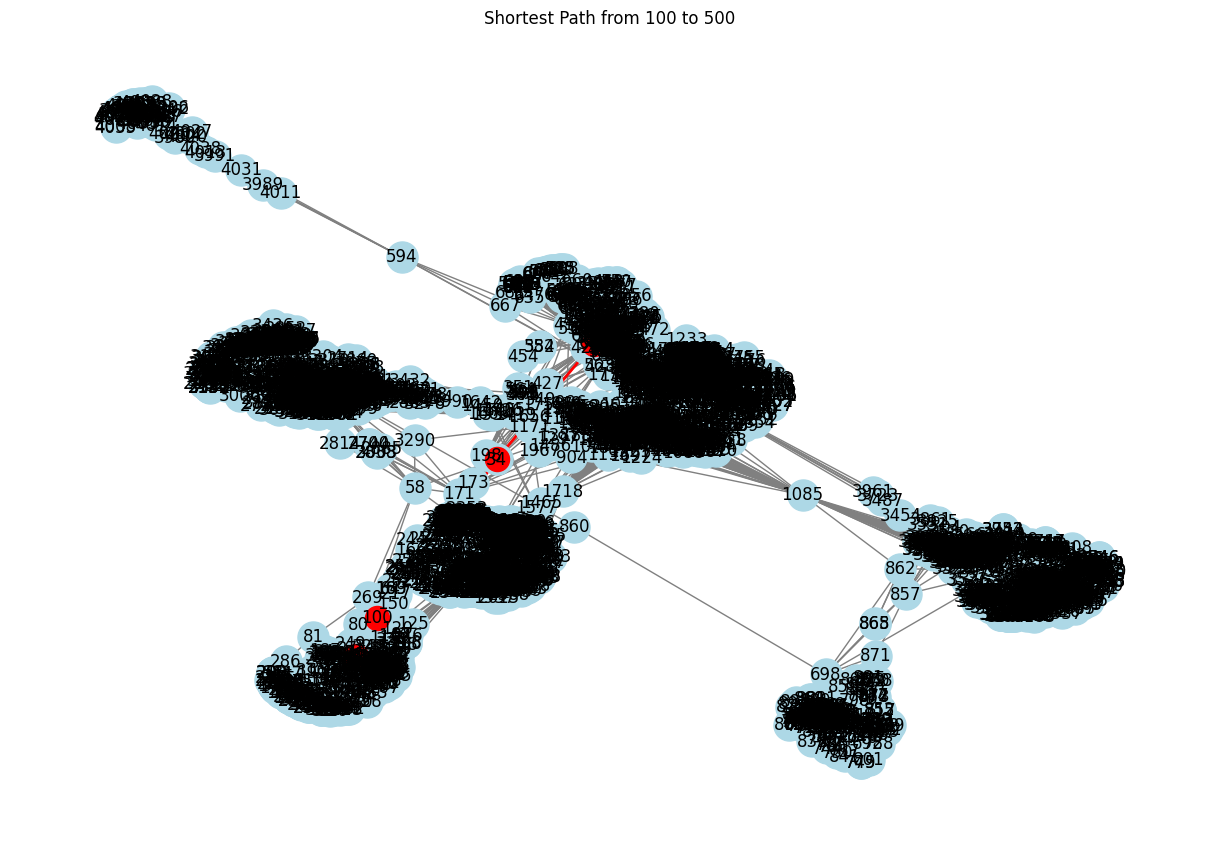

In [18]:
# Use BFS to find the shortest path
try:
    shortest_path_bfs = nx.shortest_path(G, source=start_node, target=goal_node)
    print(f"Shortest path from {start_node} to {goal_node}: {shortest_path_bfs}")
except nx.NetworkXNoPath:
    print(f"No path found between {start_node} and {goal_node}")

# Visualize the path found using BFS
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Position nodes using Fruchterman-Reingold force-directed algorithm

# Draw the entire graph
nx.draw(G, pos, node_color='lightblue', with_labels=True, node_size=500, edge_color='gray')

# Highlight the shortest path
if 'shortest_path' in locals():
    path_edges = list(zip(shortest_path_bfs, shortest_path_bfs[1:]))
    nx.draw_networkx_nodes(G, pos, nodelist=shortest_path_bfs, node_color='red')
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

plt.title(f"Shortest Path from {start_node} to {goal_node}")
plt.show()

Path from 10 to 100 using DFS: ['10', '0', '1', '48', '30', '9', '3', '25', '21', '13', '26', '40', '29', '16', '82', '56', '55', '67', '31', '7', '22', '87', '5', '122', '45', '104', '98', '59', '118', '65', '203', '50', '109', '119', '27', '54', '53', '24', '57', '80', '88', '73', '126', '260', '170', '62', '96', '133', '141', '38', '117', '77', '231', '106', '169', '103', '136', '120', '277', '39', '69', '105', '148', '113', '66', '134', '132', '72', '165', '121', '206', '178', '186', '123', '142', '158', '60', '239', '172', '128', '150', '64', '100']


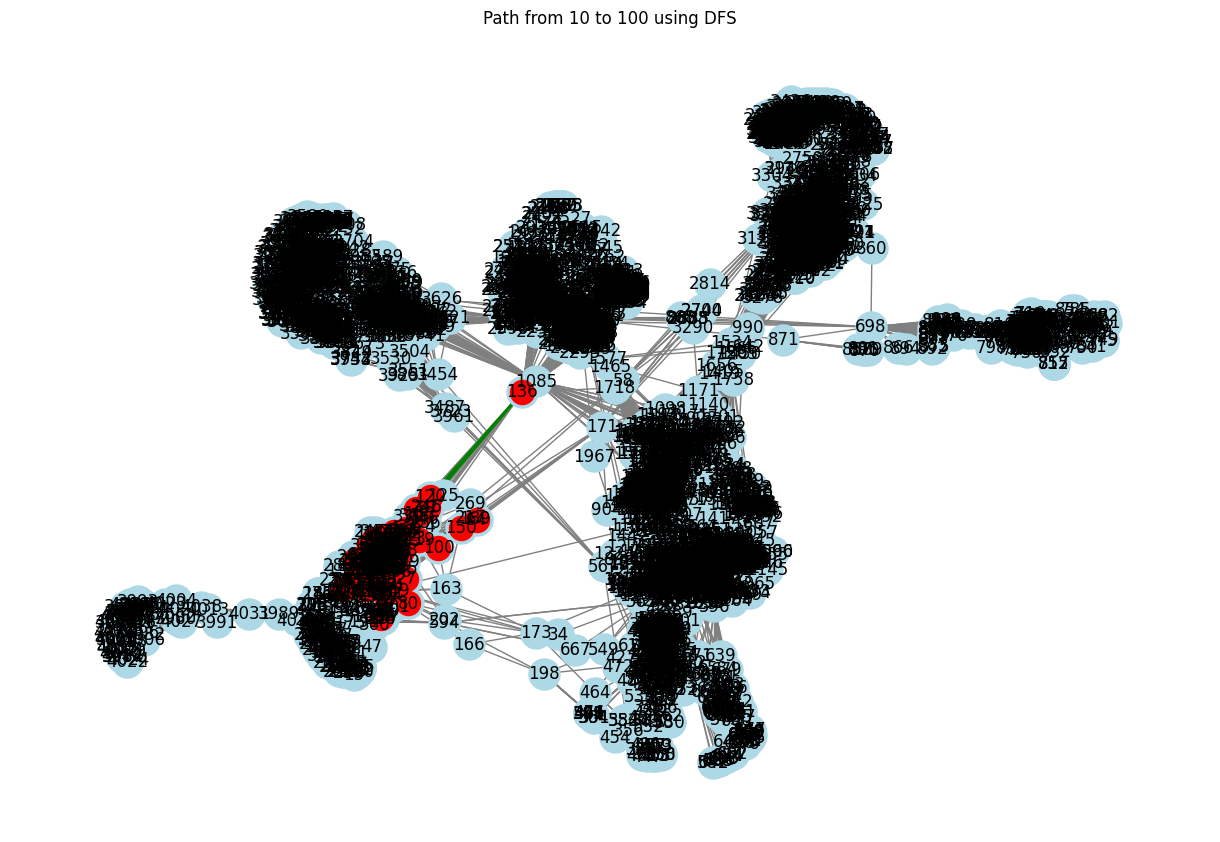

In [19]:
# Function to perform DFS and find path
def dfs_path(graph, start, goal, path=None):
    if path is None:
        path = [start]
    if start == goal:
        return path
    for neighbor in graph.neighbors(start):
        if neighbor not in path:
            new_path = dfs_path(graph, neighbor, goal, path + [neighbor])
            if new_path:
                return new_path
    return None

start_node_dfs = input("Enter starting node for DFS search: ")
goal_node_dfs = input("Enter destination node for DFS search: ")
# Use DFS to find the path
shortest_path_dfs = dfs_path(G, start_node_dfs, goal_node_dfs)

if shortest_path_dfs:
    print(f"Path from {start_node_dfs} to {goal_node_dfs} using DFS: {shortest_path_dfs}")
else:
    print(f"No path found between {start_node_dfs} and {goal_node_dfs}")

# Visualize the path found using DFS
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Position nodes using Fruchterman-Reingold force-directed algorithm

# Draw the entire graph
nx.draw(G, pos, node_color='lightblue', with_labels=True, node_size=500, edge_color='gray')

# Highlight the DFS path
if shortest_path_dfs:
    path_edges = list(zip(shortest_path_dfs, shortest_path_dfs[1:]))
    nx.draw_networkx_nodes(G, pos, nodelist=shortest_path_dfs, node_color='red')
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=2)

plt.title(f"Path from {start_node_dfs} to {goal_node_dfs} using DFS")
plt.show()